<a href="https://colab.research.google.com/github/DeaAnalytics/univ-workshop/blob/main/notebooks/R/Sesion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#leer el archivo .csv y renombrarlo como data
RL1 <-read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionLineal_train.csv")
RL1

peso,long
<int>,<int>
46,30
55,35
52,33
56,35
50,36
52,36
55,36
47,31
53,38


In [3]:
#Descargamos el paquete que usaremos: ggplot
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



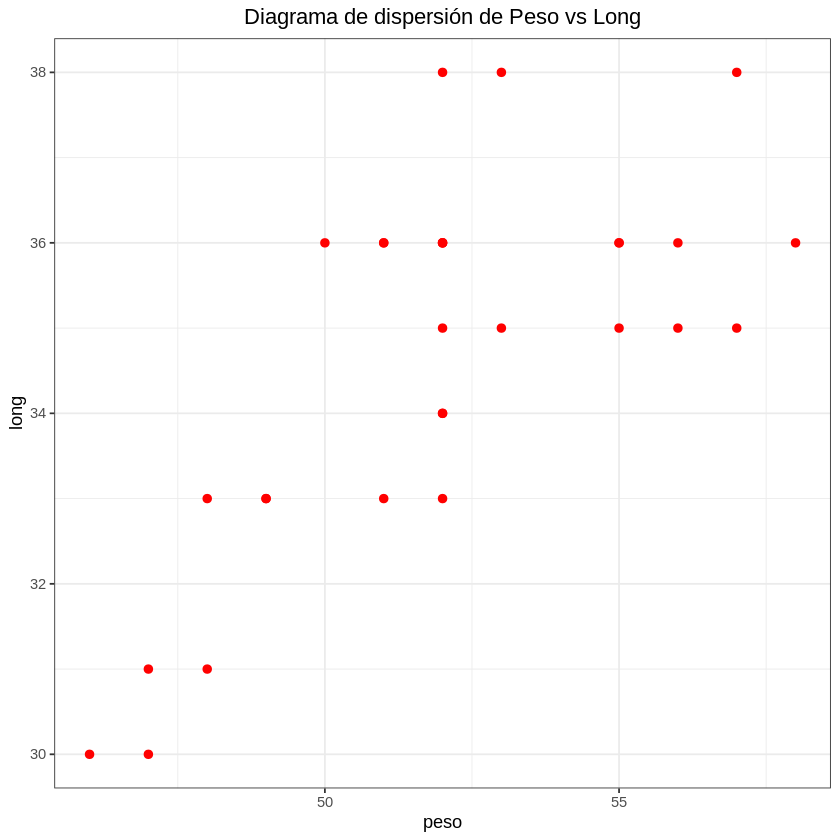

In [4]:
#Gráfico de dispersión utilizando la librería ggplot2 y la función ggplot donde mi data=RL1 (nombre que le dí a mi tabla), defino quien es x e y
#con la funcionalidad geom_point le doy color y tamaño a mis puntos en el gráfico de dispersión
#con labs le doy título y nombre al eje x
library(ggplot2)
ggplot(data = RL1, mapping = aes(x = peso, y = long)) + 
  geom_point(color = "red", size = 2) +
  labs(title = "Diagrama de dispersión de Peso vs Long", x = 'peso') + 
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

`geom_smooth()` using formula 'y ~ x'



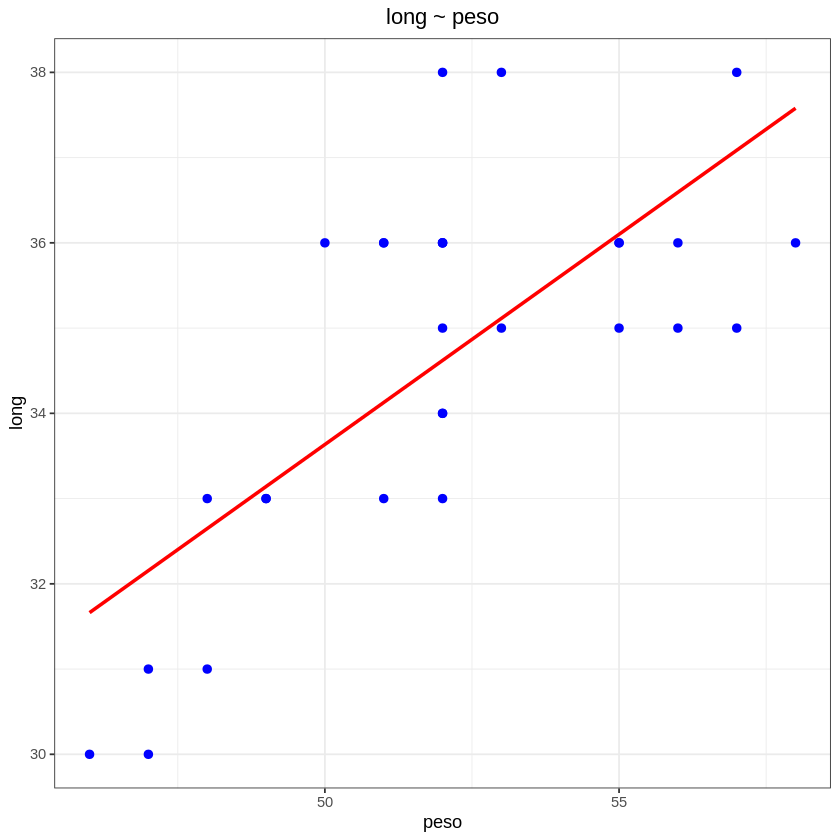

In [5]:
#Gráfico de dispersión con recta estimada: es practicamente lo mismo, solo le cambio a color azul los puntos, el título 
#utilizo geom_smooth para utilizar el método lm para trazar la recta estimada y le doy color rojo
ggplot(data = RL1, mapping = aes(x = peso, y = long)) +
  geom_point(color = "blue", size = 2) +
  labs(title = 'long ~ peso', x = 'peso') +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

In [6]:
#Coeficiente de Correlación (Método de Pearson), Modelo de regresión lineal (con la función lm para relacionar long con peso) y el summary de lm 
cor.test(x = RL1$peso, y = RL1$long, method = "pearson")
modelo_lineal <- lm(long ~ peso, RL1)
summary(modelo_lineal)
#CONSTRUCCIÓN DE LA PREDICCIÓN DE LONG: long_estimado=0.49310*long + 8.97931 (lo obtenemos a continuación), pero aún falta VALIDAR LOS SUPUESTOS


	Pearson's product-moment correlation

data:  RL1$peso and RL1$long
t = 5.3582, df = 27, p-value = 1.165e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4768279 0.8585050
sample estimates:
      cor 
0.7178773 



Call:
lm(formula = long ~ peso, data = RL1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1552 -1.1552 -0.1414  1.3793  3.3793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.97931    4.79431   1.873   0.0719 .  
peso         0.49310    0.09203   5.358 1.17e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.567 on 27 degrees of freedom
Multiple R-squared:  0.5153,	Adjusted R-squared:  0.4974 
F-statistic: 28.71 on 1 and 27 DF,  p-value: 1.165e-05


In [8]:
#Anova para validar que si Valor crítico de F<0.05 (que aparece como Pr(>F)) se rechaza H0, entonces x~y. En este caso es 1.16x10-05
anova(modelo_lineal)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
peso,1,70.51379,70.513793,28.71005,1.165042e-05
Residuals,27,66.31379,2.456066,NA,NA


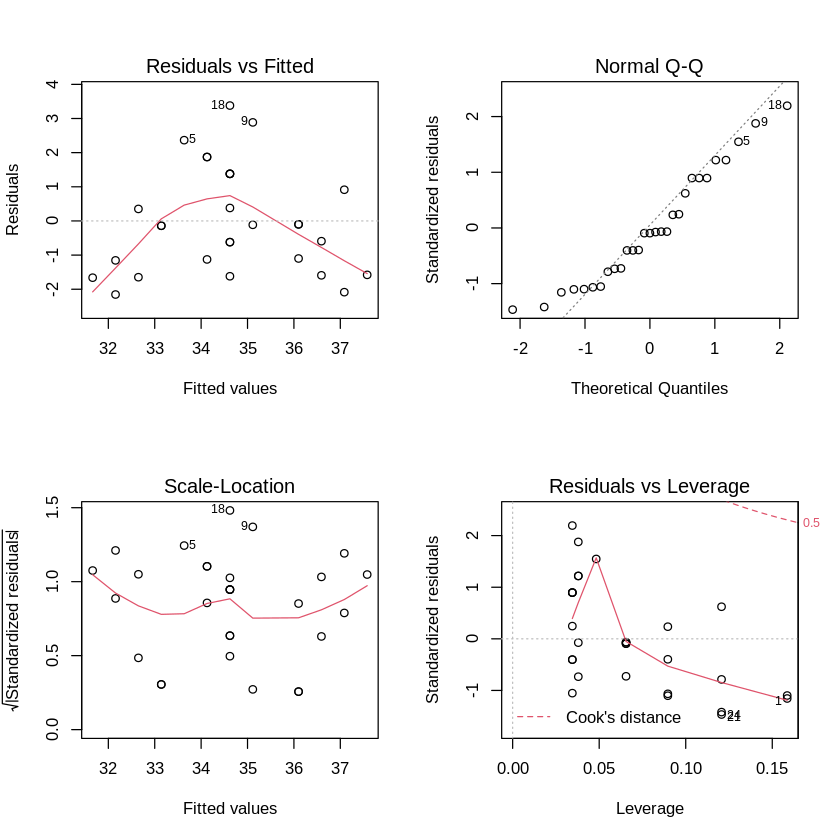

In [9]:
#Hacemos la validación de Supuestos: Gráficos de residuales
par(mfrow = c(2,2))
plot(modelo_lineal)
par(mfrow = c(1,1))

In [11]:
#Ahora tomemos una tabla (SIEMPRE diferente con la que entrenamos a nuestro modelo) y obtenemos su long_estimado=0.49310*long + 8.97931 (PREDICCIÓN)
RL_test <-read.csv("https://github.com/DeaAnalytics/univ-workshop/raw/main/data/RegresionLineal_Test.csv")
RL_test

peso,long,long_estimado
<int>,<int>,<dbl>
52,33,34.62051
58,37,37.57911
48,32,32.64811
53,36,35.11361
52,34,34.62051
57,35,37.08601
48,31,32.64811
52,35,34.62051
51,34,34.12741


In [13]:
#Descargamos el siguiente paquete para poder utilizar la librería de plotly más adelante
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




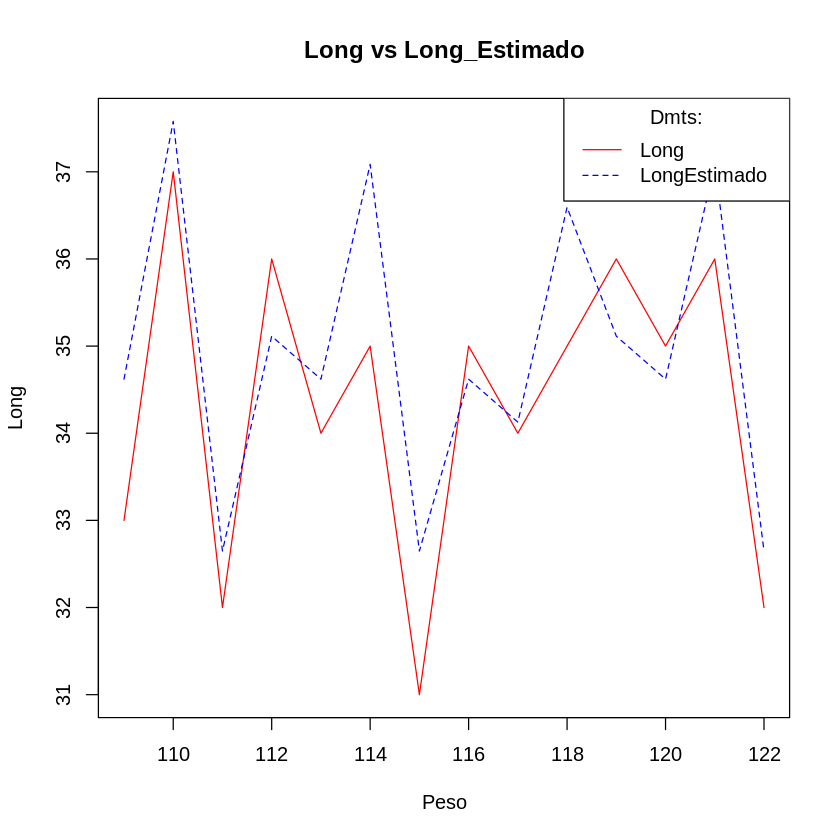

In [16]:
#Para hacer lo siguiente de comparar la plot que contiene los datos reales vs predichos (estimados) se usan las librerías de ggplot2 y plotly
#La serie1 que es la real, se ponen dentro quien es "x = RL_test#long" y quien es "y=RL_test$peso"
#La serie2 que es la estimada, se ponen dentro quien es "x = RL_test#long_estimado" y la y se queda igual "y=RL_test$peso"
#Intersectamos las dos series usando ts.intersect y la renombramos "D" (recuerden que pueden usar cualquier nombre)
#Las graficamos a través de "plot", ponemos quien es nuestra data (en este caso la renombré D), el título "Long vs Long Estimado" nombres a x e y
#y también el tipo de plot que en este caso es single, le damos colores distintos para que se distingan y lty para dejar una punteada y otra lisa
#Utilizo legend para poner el recuadro superior izquierdo con un poco más de información y nuevamente funcionalidades similares a las que ya manejamos.
library(plotly)
library(ggplot2)
serie1=ts(RL_test$long, RL_test$peso)
serie2=ts(RL_test$long_estimado, RL_test$peso)
D <- ts.intersect(serie1, serie2)
plot(D, main="Long vs Long_Estimado", xlab="Peso", ylab="Long", plot.type = "single",
     col=c("red","blue"), lty=c(1,2))
legend("topright", title = "Dmts:" ,legend=c("Long", "LongEstimado"), col=c("red","blue"),
       lty=c(1,2))